In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [19]:
# glasstypes 
glassType = {1:'building_windows_float_processed',
             2:'building_windows_non_float_processed',
             3:'vehicle_windows_float_processed',
             4:'vehicle_windows_non_float_processed',
             5:'containers',
             6:'tableware',
             7:'headlamps'}

In [20]:
# load glass dataset 
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
# all the observations are numerical 
# no null values present 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [22]:
# dataset contains 214 observations 
# and 10 columns 
data.shape

(214, 10)

#### unscaled features

In [23]:
# feature and target (unscaled)
X = data.iloc[:,:-1]
Y = data[['Type']]

#### scaled features 

In [24]:
# since knn uses euclidean distance between 
# two datapoints to find nearest neighbors 
# and since Eucledian distance is sensitive 
# to magnitude. scaling of features is needed.
scale = MinMaxScaler(feature_range=(0,1))
scale_X = pd.DataFrame(scale.fit_transform(X),
                       columns=X.columns)
scale_X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [25]:
# spliting data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(scale_X,Y,test_size=0.2,
                                                 random_state=42)

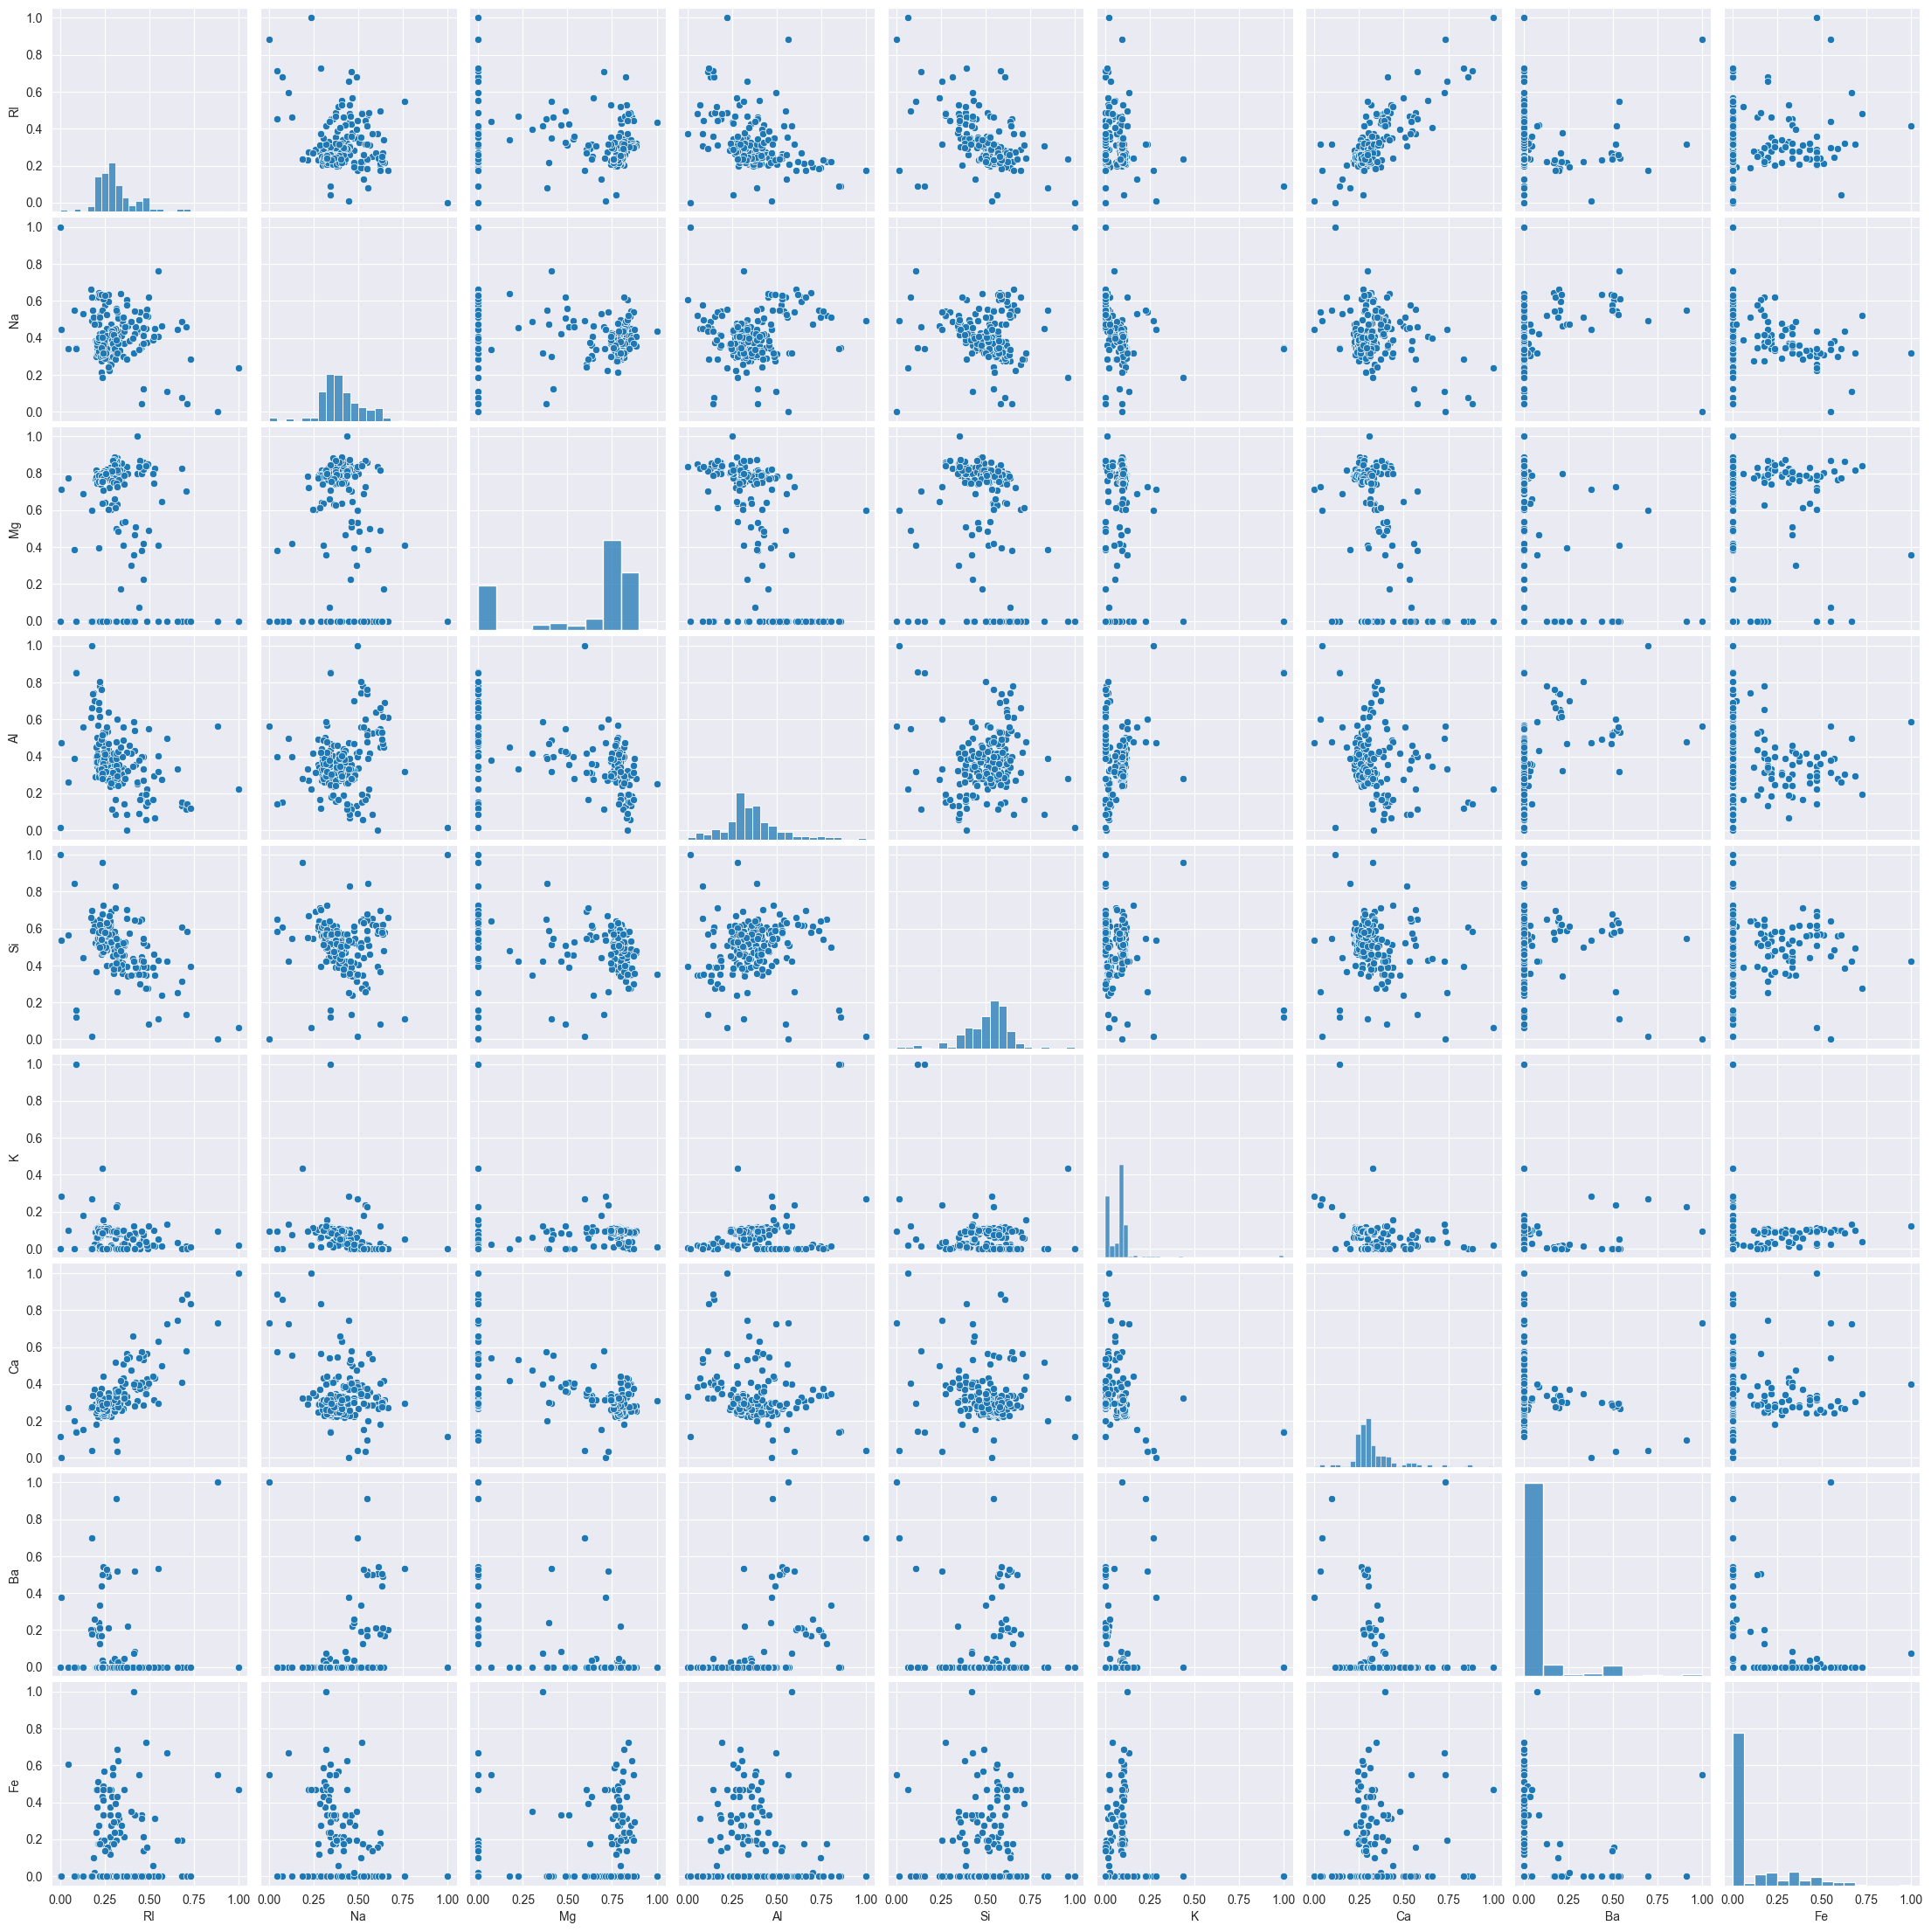

In [26]:
# visualizing feature dataset 
sns.pairplot(data=scale_X)
plt.show()

In [27]:
# using brute force approach find train/test error 
# for individual k values
trainScore = []
testScore = []
neighbors = []
for num in range(2,21):
    model = KNeighborsClassifier(n_neighbors=num)
    model.fit(X_train,Y_train)
    trainScore.append(1-model.score(X_train,Y_train))
    testScore.append(1-model.score(X_test,Y_test))
    neighbors.append(num)

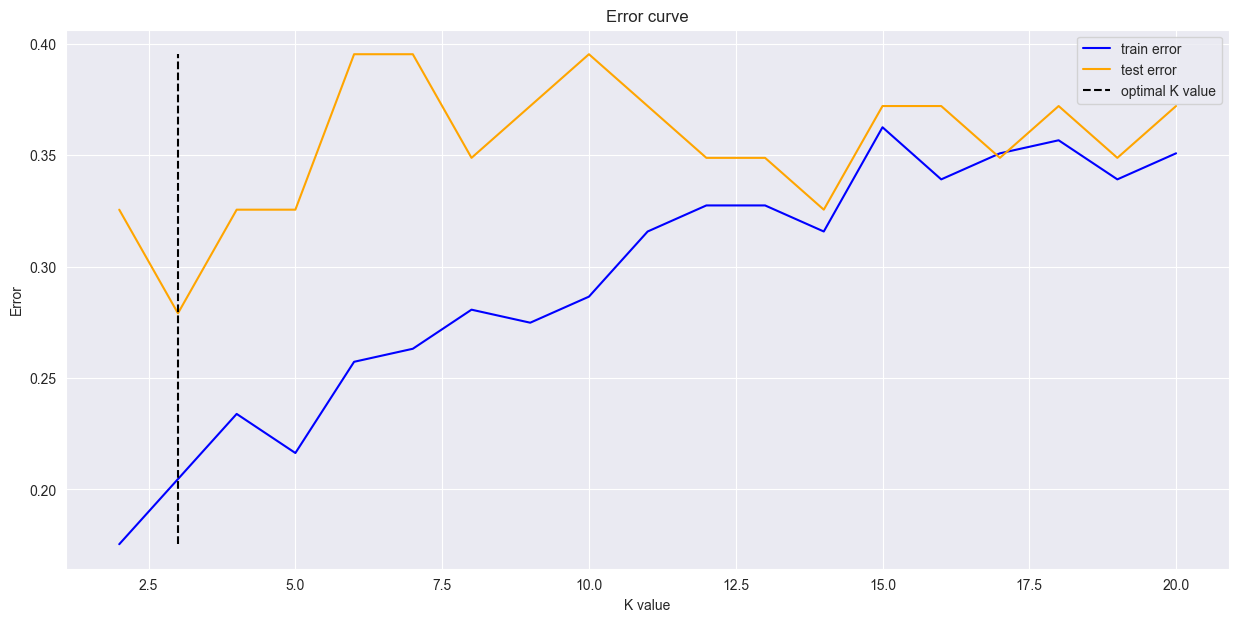

In [28]:
# visualize error curve
plt.figure(figsize=(15,7))
plt.plot(neighbors,trainScore,color='blue',
         label='train error')
plt.plot(neighbors,testScore,color='orange',
         label='test error')
ub = max([max(trainScore),max(testScore)])
lb = min([min(trainScore),min(testScore)])
k_opt = neighbors[testScore.index(min(testScore))]
plt.plot([k_opt,k_opt],[lb,ub],color='black',linestyle='dashed',label='optimal K value')
plt.title('Error curve')
plt.ylabel('Error')
plt.xlabel('K value')
plt.legend()
plt.show()

### KNN classifier gives min error at k=3

In [29]:
# making KNN classifier with optimized n_neighbors 
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
print(f'Training accuracy of KNN classifier : {round(clf.score(X_train,Y_train)*100,2)}%')
print(f'Testing accuracy of KNN classifier : {round(clf.score(X_test,Y_test)*100,2)}%')

Training accuracy of KNN classifier : 79.53%
Testing accuracy of KNN classifier : 72.09%


In [31]:
# making predictions on testing data
np.set_printoptions(suppress=True)
testData = pd.DataFrame(scale.inverse_transform(X_test),columns=X.columns)
testData['Predicted Glass Type'] = clf.predict(X_test)
testData['Predicted Glass Type'].replace(glassType,inplace=True)

In [32]:
testData.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Predicted Glass Type
0,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,building_windows_non_float_processed
1,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,headlamps
2,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,building_windows_float_processed
3,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,headlamps
4,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,building_windows_non_float_processed


## built KNN classifier to predict Glass type with training accuracy of 79.53% and testing accuracy of 72.09%